# **Yes Bank Stock Closing Price Prediction**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Kuldeep Sharma**


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The main objective is to predict the stock’s closing price of the month.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
yesbank_df=pd.read_csv('/content/drive/MyDrive/data set/data_YesBank_StockPrices.csv')

### Dataset First View

In [6]:
# Dataset First Look
yesbank_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
yesbank_df.shape

(185, 5)

### Dataset Information

In [8]:
# Dataset Info
yesbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
yesbank_df.duplicated().sum()

0

#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
yesbank_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

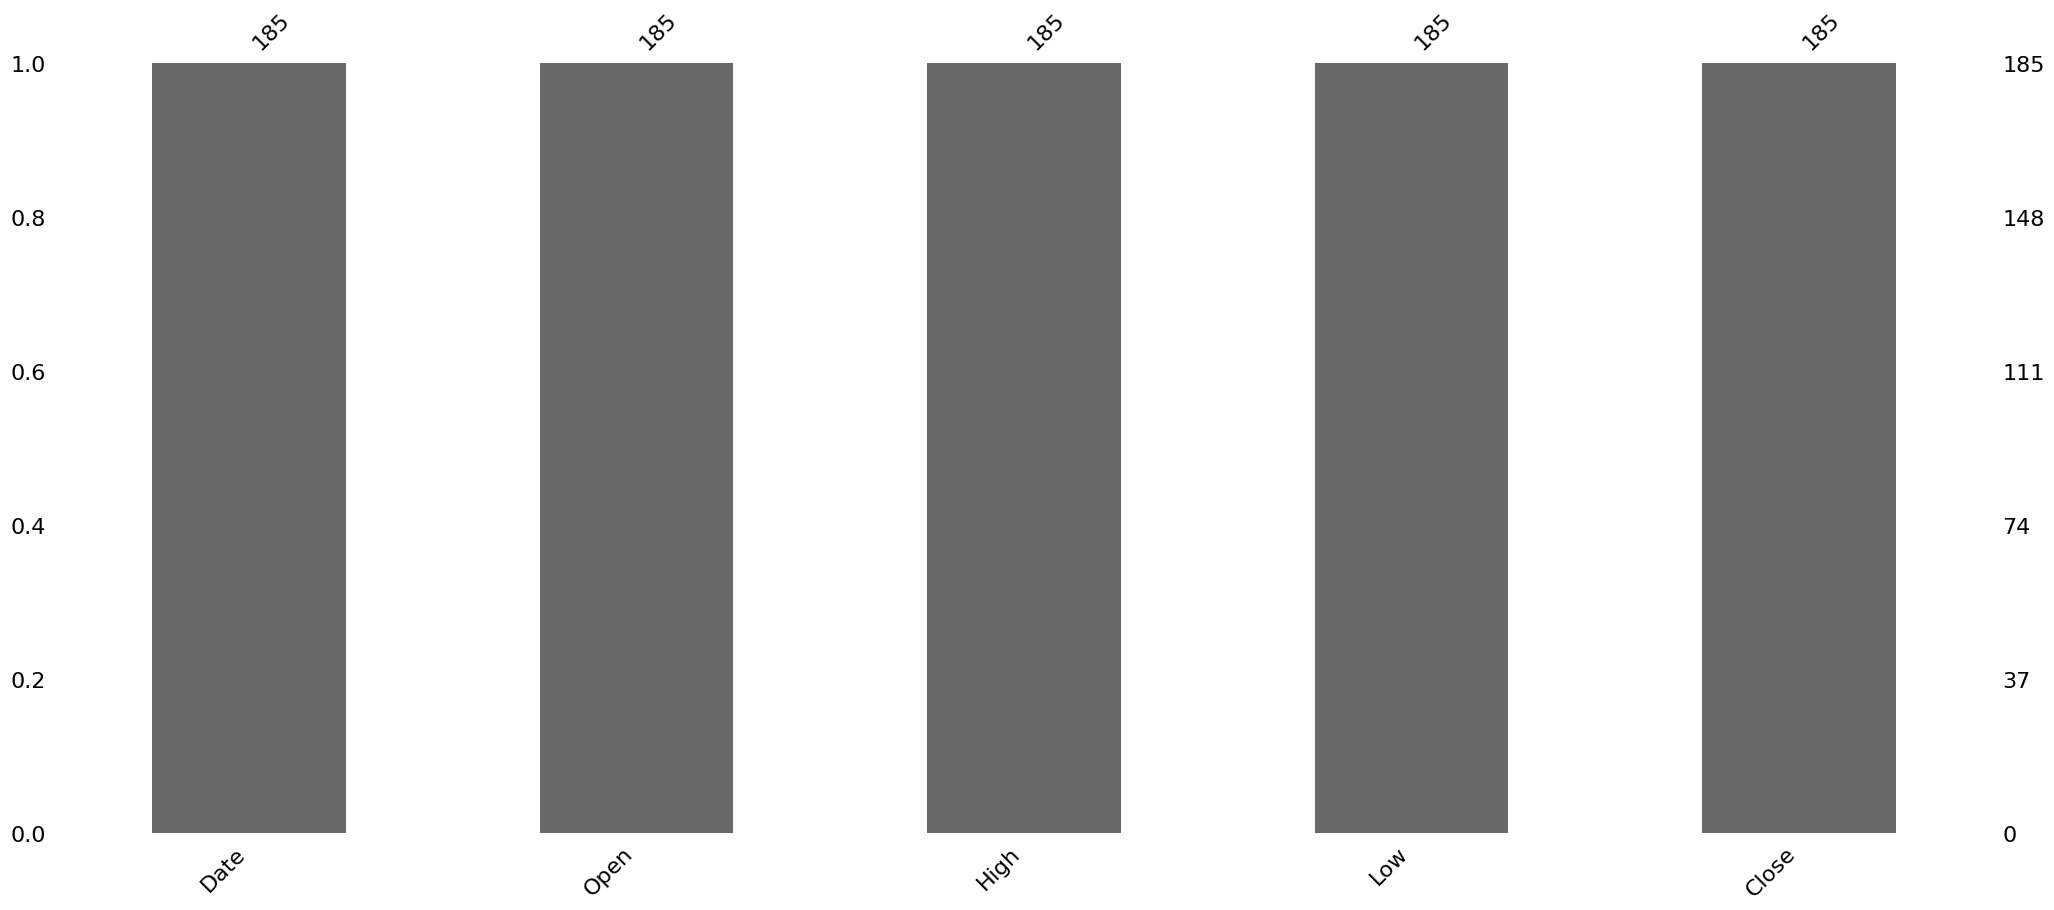

In [13]:
# Visualizing the missing values
import missingno as msn
msn.bar(yesbank_df)

### What did you know about your dataset?

1. Data set contain 185 rows and 5 columns.
2. In the data set there is no missing value
3. In the data frame there is no null value
4. There are 4 columns with float data type and 1 with object data type.

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns
yesbank_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [17]:
# Dataset Describe
yesbank_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

1. Date: Date of record.
2. open: Opening price.
3. high: Highiest price of the day.
4. low:  Lowest price of the day.
5. close: Closing Price.

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
yesbank_df.apply(lambda x:x.unique())
print("Count of unique value in dataframe")
yesbank_df.apply(lambda x:len(x.unique()))

Count of unique value in dataframe


Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [4]:
# Write your code to make your dataset analysis ready.
from datetime import datetime
yesbank_df['Date']=yesbank_df['Date'].apply(lambda x: datetime.strptime(x,'%b-%y'))

In [20]:
yesbank_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

1. we have converted our Date feature into datetime format.
2. Now our data is clean for EDA and there is no null and duplicate value.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [22]:
yesbank_df['Open']

0      13.00
1      12.58
2      13.48
3      13.20
4      13.35
       ...  
180    25.60
181    12.00
182    14.30
183    13.30
184    12.41
Name: Open, Length: 185, dtype: float64

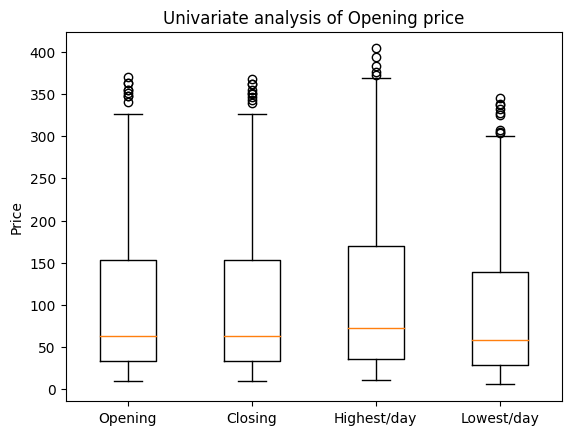

In [25]:
# Chart - 1 visualization code
plt.boxplot(yesbank_df[['Open','Close','High','Low']],labels=['Opening','Closing','Highest/day','Lowest/day'])

plt.title('Univariate analysis of Opening price')
plt.ylabel('Price')
plt.show()


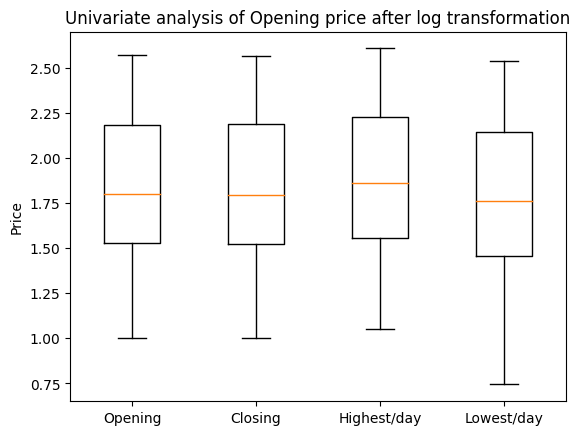

In [51]:
plt.boxplot(np.log10(yesbank_df[['Open','Close','High','Low']]),labels=['Opening','Closing','Highest/day','Lowest/day'])

plt.title('Univariate analysis of Opening price after log transformation')
plt.ylabel('Price')
plt.show()

##### 1. Why did you pick the specific chart?

Box plot are good choice to visualise outlier in the dataset.

##### 2. What is/are the insight(s) found from the chart?

There are some outlier in the opening,closing,higest and lowest price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are som eoutlier in the dataset that may lead to poor prediction for price.Outliers are removed. Yes bank can easily analyse the outlier in the data

#### Chart - 2

In [41]:
features=yesbank_df.columns.values.tolist()
features

['Date', 'Open', 'High', 'Low', 'Close']

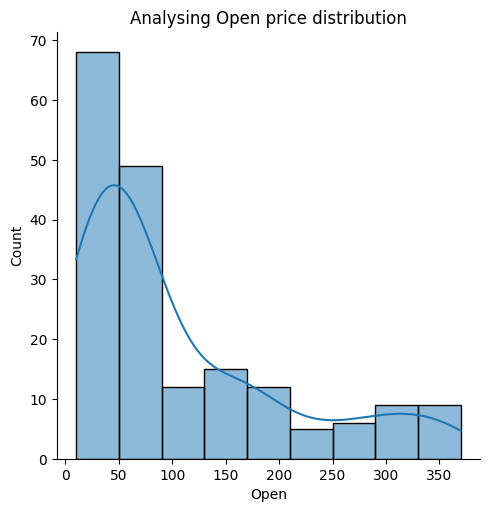

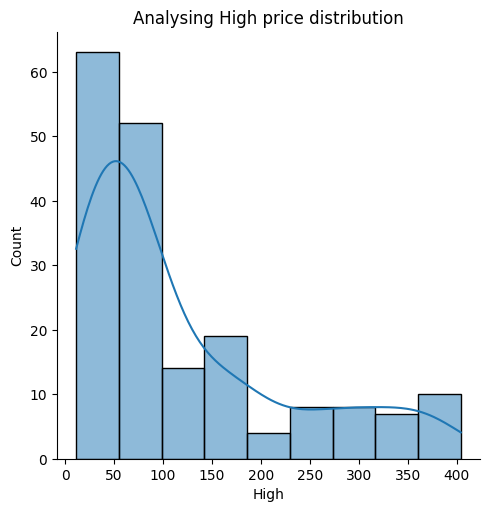

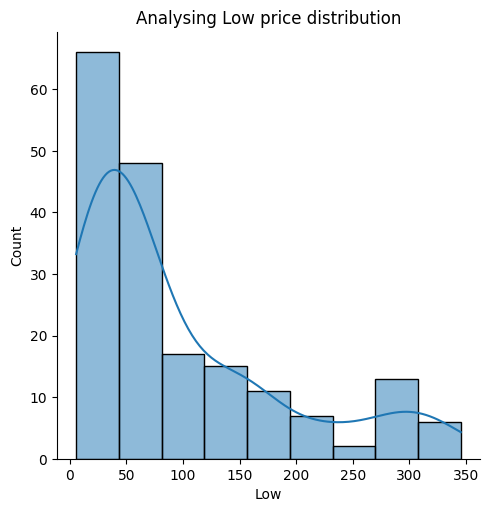

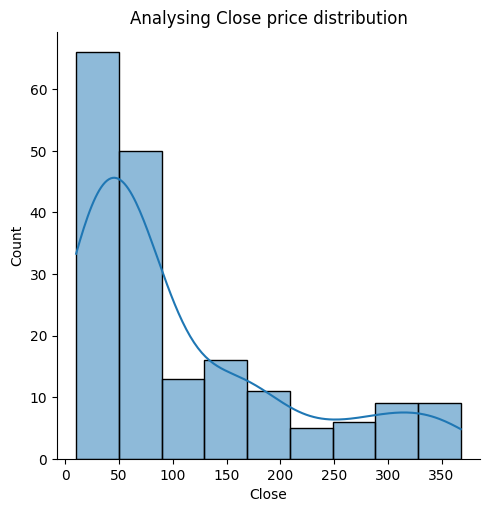

In [48]:
# Chart - 2 visualization code

for i in features[1:]:
 sns.displot(yesbank_df[i],kde=True)
 plt.title(f"Analysing {i} price distribution")
 plt.show()

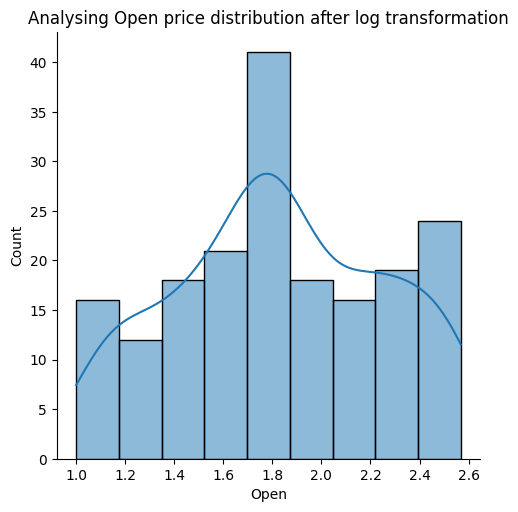

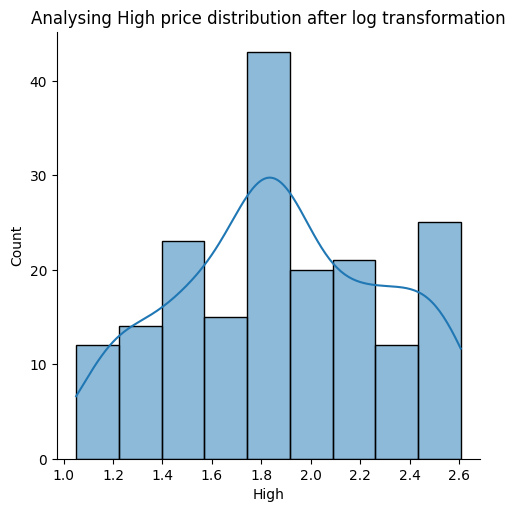

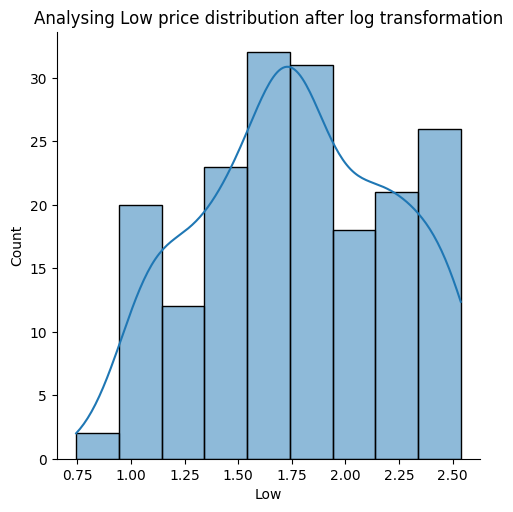

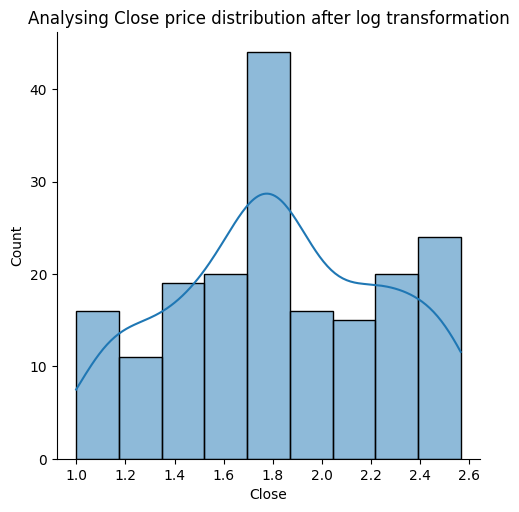

In [52]:
for i in features[1:]:
 value=np.log10(yesbank_df[i])
 sns.displot(value,kde=True)
 plt.title(f"Analysing {i} price distribution after log transformation")
 plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution features in the dataset

##### 2. What is/are the insight(s) found from the chart?

Data is left skewed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Low price count is high as compared to the high price.

#### Chart - 3

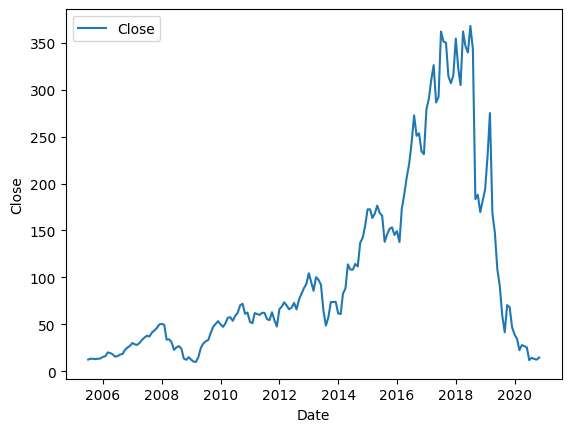

In [60]:
# Chart - 3 visualization code
sns.lineplot(yesbank_df,x='Date',y='Close',label='Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

TO know closing price trend over time.

##### 2. What is/are the insight(s) found from the chart?

closing price is increasing till 2018 after that there is sudden fall in the closing price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes bank share value increased till 2018 after that it decreases.

#### Chart - 4

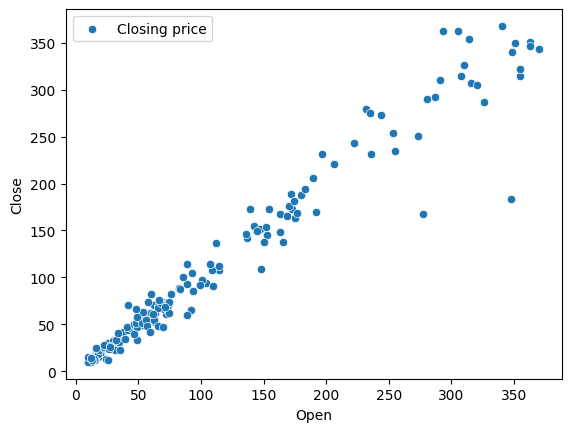

In [61]:
# Chart - 4 visualization code
sns.scatterplot(yesbank_df,x='Open',y='Close',label='Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

scatter chart are best to analysis the relation between variables

##### 2. What is/are the insight(s) found from the chart?

closing and opening price are highly corelated, when closing price increase opening price also increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If Opening price is high chance are high that close price will be high than before.

#### Chart - 5

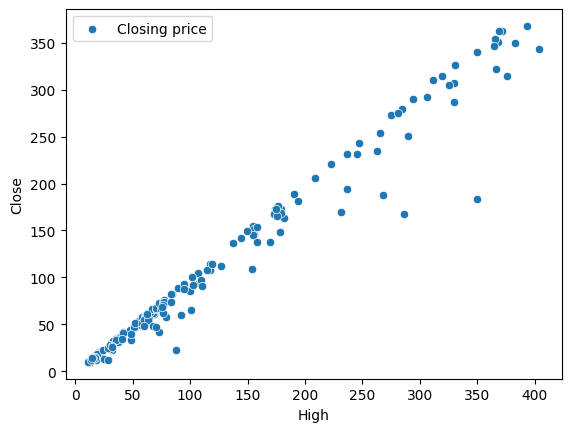

In [62]:
# Chart - 5 visualization code
sns.scatterplot(yesbank_df,x='High',y='Close',label='Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter chart are best to visualize the relation between two or more variable.

##### 2. What is/are the insight(s) found from the chart?

Highest price on the day is highly corelated to the closing price on that day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Highest price and closing price are highly corelated and proportional to each other.

#### Chart - 6

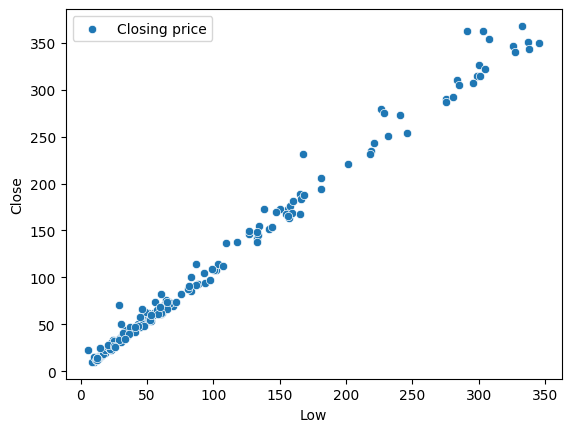

In [63]:
# Chart - 6 visualization code
sns.scatterplot(yesbank_df,x='Low',y='Close',label='Closing price')
plt.show()

##### 1. Why did you pick the specific chart?

Scatter chart are best to visualize the relation between two or more variable.

##### 2. What is/are the insight(s) found from the chart?

Lowest price on the day is highly corelated to the closing price on that day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Lowest price and closing price are proportional to each other.

####  Correlation Heatmap

In [72]:
df=yesbank_df[['Open','Close','High','Low']]
df

,Open,Close,High,Low
0,13.00,12.46,14.00,11.25
1,12.58,13.42,14.88,12.55
2,13.48,13.30,14.87,12.27
3,13.20,12.99,14.47,12.40
4,13.35,13.41,13.88,12.88
...,...,...,...,...
180,25.60,11.95,28.30,11.10
181,12.00,14.37,17.16,11.85
182,14.30,13.15,15.34,12.75
183,13.30,12.42,14.01,12.11


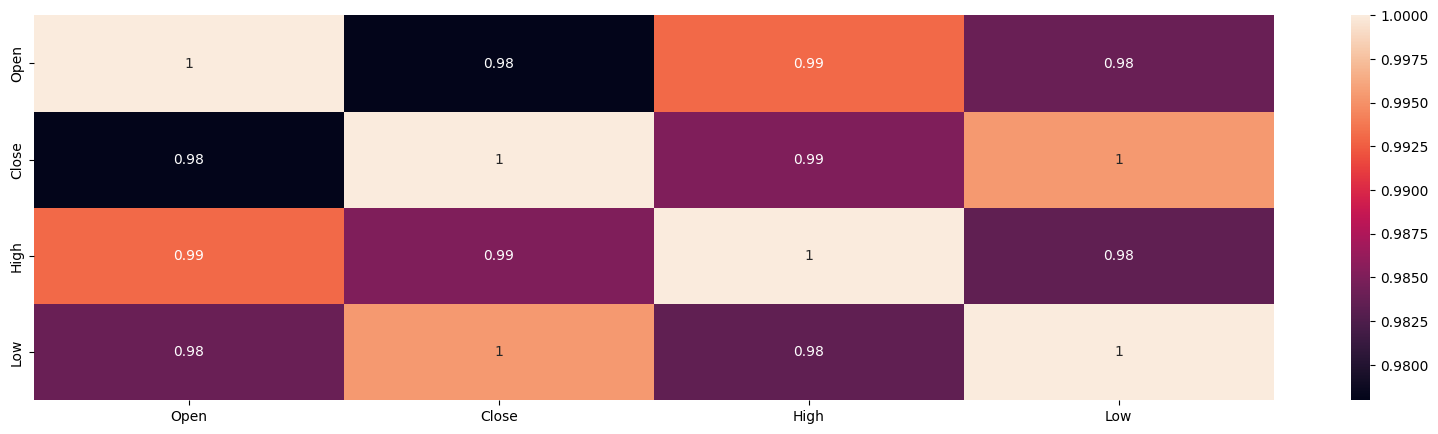

In [74]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

To check the degree of corelation between the variable.

##### 2. What is/are the insight(s) found from the chart?

Variables are highly corelated to each other.

#### Chart - 15 - Pair Plot

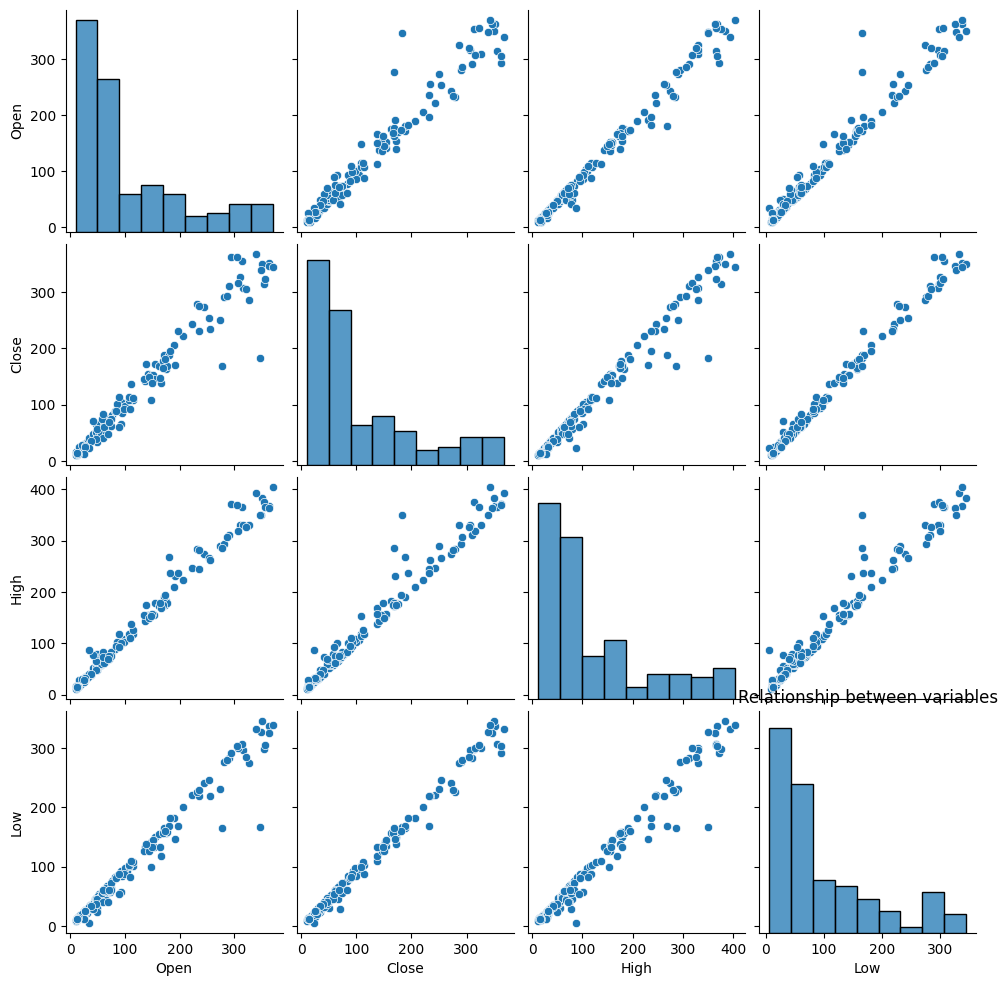

In [76]:
# Pair Plot visualization code
sns.pairplot(df)
plt.title("Relationship between variables")
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot are used to see realtion between different variables

##### 2. What is/are the insight(s) found from the chart?

Variables shows linear relation with each other.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [5]:
yesbank_df.set_index('Date',inplace=True)
yesbank_df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [7]:
q1 = yesbank_df.quantile(0.25)
q3 = yesbank_df.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_iqr = yesbank_df[((yesbank_df < lower_bound) | (yesbank_df > upper_bound)).any(axis=1)]
df_no_outliers_iqr = yesbank_df[((yesbank_df >= lower_bound) & (yesbank_df <= upper_bound)).all(axis=1)]

print("\nOutliers detected using IQR Outlier Removal:")
print(outliers_iqr)


Outliers detected using IQR Outlier Removal:
              Open    High     Low   Close
Date                                      
2017-07-01  293.04  372.00  290.78  361.96
2017-08-01  363.00  368.52  337.37  351.15
2017-09-01  351.00  383.25  345.50  350.00
2017-10-01  354.60  375.75  299.00  314.35
2018-01-01  314.00  366.00  307.35  354.45
2018-02-01  355.00  366.50  304.65  322.25
2018-04-01  305.00  368.75  303.30  362.05
2018-05-01  362.85  364.40  325.70  346.20
2018-06-01  348.00  350.10  327.35  339.60
2018-07-01  340.00  393.35  332.45  367.90
2018-08-01  369.95  404.00  338.00  343.40
2018-09-01  347.20  350.00  166.15  183.45


##### What all outlier treatment techniques have you used and why did you use those techniques?

Interquartile Range (IQR) to identify outliers, and say goodbye to those data points that fall outside the fences.
1. The first quartile (q1), third quartile (q3), and interquartile range (iqr) are calculated using the df.quantile() function.
2. The lower bound and upper bound are defined as (q1 - 1.5 * iqr) and (q3 + 1.5 * iqr), respectively.
3. The DataFrame is filtered using boolean indexing to select rows where any value is below the lower bound or above the upper bound, indicating an outlier.
4. The DataFrame without outliers is obtained by filtering rows where all values are within the specified range.


### 2. Feature Manipulation & Selection

### 1. Data Scaling

In [8]:
df1=df_no_outliers_iqr

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer

In [12]:
# Scaling your data
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df1), columns=df1.columns)

# Print the original and scaled DataFrames
print("Original DataFrame:")
print(df1)
print("\nMin-Max Scaling:")
print(df_minmax)

Original DataFrame:
             Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41
...           ...    ...    ...    ...
2020-07-01  25.60  28.30  11.10  11.95
2020-08-01  12.00  17.16  11.85  14.37
2020-09-01  14.30  15.34  12.75  13.15
2020-10-01  13.30  14.01  12.11  12.42
2020-11-01  12.41  14.90  12.21  14.67

[173 rows x 4 columns]

Min-Max Scaling:
         Open      High       Low     Close
0    0.009494  0.008643  0.019315  0.007844
1    0.008165  0.011399  0.023721  0.010881
2    0.011013  0.011367  0.022772  0.010501
3    0.010127  0.010115  0.023212  0.009520
4    0.010601  0.008267  0.024839  0.010849
..        ...       ...       ...       ...
168  0.049367  0.053423  0.018807  0.006231
169  0.006329  0.018538  0.021349  0.013885
170  0.013608  0.012839  0.024399  

Min-Max scaling transforms data to a fixed range, often between 0 and 1. data was not normally distributed after min-max scaling tranformed into normal form.

<ipython-input-13-c1e4a8084282>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_minmax)


<Axes: ylabel='Density'>

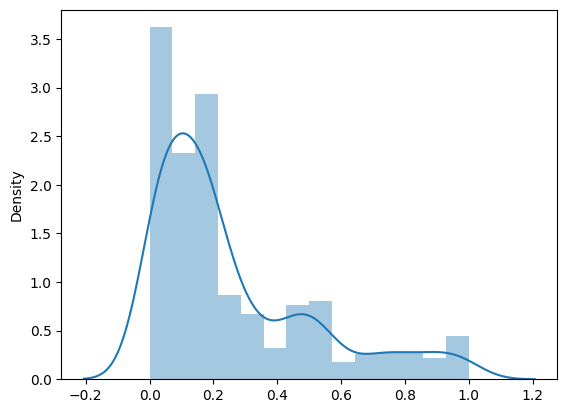

In [13]:
sns.distplot(df_minmax)

In [14]:
transformer_log = FunctionTransformer(np.log1p)
df_log = pd.DataFrame(transformer_log.transform(df1), columns=df1.columns)

# Print the original and scaled DataFrames
print("Original DataFrame:")
print(df1)
print("\nLog Transformation:")
print(df_log)

Original DataFrame:
             Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41
...           ...    ...    ...    ...
2020-07-01  25.60  28.30  11.10  11.95
2020-08-01  12.00  17.16  11.85  14.37
2020-09-01  14.30  15.34  12.75  13.15
2020-10-01  13.30  14.01  12.11  12.42
2020-11-01  12.41  14.90  12.21  14.67

[173 rows x 4 columns]

Log Transformation:
                Open      High       Low     Close
Date                                              
2005-07-01  2.639057  2.708050  2.505526  2.599722
2005-08-01  2.608598  2.765060  2.606387  2.668616
2005-09-01  2.672768  2.764431  2.585506  2.660260
2005-10-01  2.653242  2.738903  2.595255  2.638343
2005-11-01  2.663750  2.700018  2.630449  2.667922
...              ...       ...       ...       ...
2020-07-01  3.280911

<ipython-input-15-a34ac40b676e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_log)


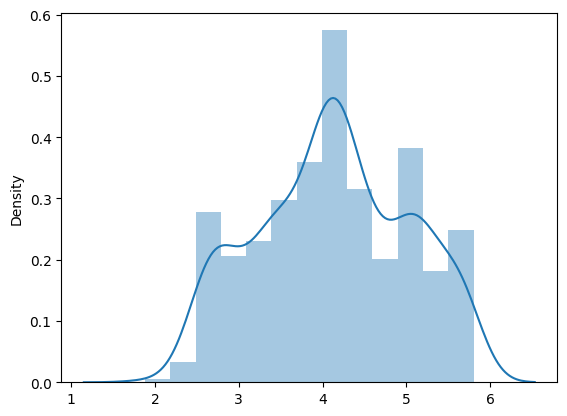

In [15]:
sns.distplot(df_log)
plt.show()

##### Which method have you used to scale you data and why?

will use log transformation as data is more normally distributed using log transformation.

### 2. Data Splitting

In [16]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X =df_log.drop('Close', axis=1).values
y= df_log['Close'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



##### What data splitting ratio have you used and why?

We have use 80:20 for train and test data as it is mostly used for analysis.

## ***7. ML Model Implementation***

### ML Model - 1

In [17]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression
model= LinearRegression()

# Fit the Algorithm
model.fit(X_train, y_train)

# Predict on the model
y_pred = model.predict(X_test)

In [36]:
print(y_pred)
print(y_test)

[3.71063778 2.72750911 4.65488629 4.09049469 5.14814658 5.44317689
 2.73540263 3.16488642 4.99036472 4.68027239 5.02131154 4.13494591
 4.12555334 3.25464033 3.89182442 2.97546525 4.8773944  3.94147488
 3.68874994 5.28097997 4.58067567 2.81469893 5.70206355 3.95292366
 3.87670009 4.13826413 5.70093381 3.40750306 3.29313286 5.77152903
 3.65455107 3.5043016  2.77630458 5.66730935 5.08786169]
[3.693867   2.58324255 4.65785751 4.09417788 5.1561776  5.44785743
 2.77446197 3.16884489 5.04709579 4.69327263 5.03889876 4.20499108
 4.20454335 3.22406235 3.92038792 3.01993696 4.92602104 3.95066663
 3.66176516 5.12989871 4.61788896 2.80032548 5.72325825 3.92809319
 3.87784555 4.15166963 5.68143461 3.38878736 3.27032911 5.79038821
 3.94235821 3.43913522 2.84258109 5.67524582 5.15646574]


<Axes: >

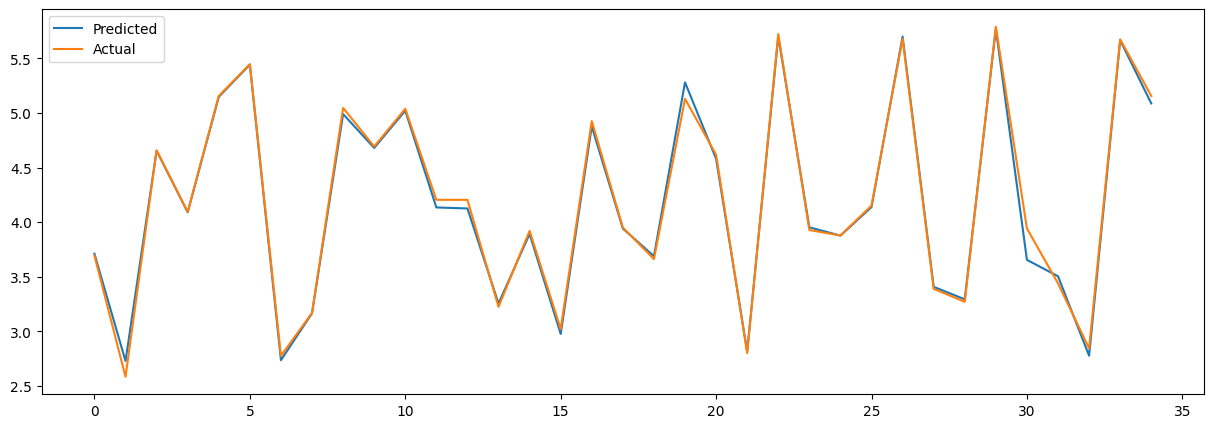

In [18]:
plt.figure(figsize=(15,5))
sns.lineplot(y_pred,label='Predicted')
sns.lineplot(y_test,label='Actual')

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [19]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0048001180539826716


In [20]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 0.07


In [21]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")

MAE: 0.04


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)*100

print(f"MAPE: {mape:.2f}%")

MAPE: 1.11%


In [23]:
# Calculate R² (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2:.2f}")

R-Squared: 0.99


In [24]:
matrix_score=pd.DataFrame({'Mean Squared Error':mse,'Root mean Squared Error':rmse,'mean_absolute_erro':mae,'mean_absolute_percentage_error':mape,'Coefficient of Determination':r2},index=['score'])

In [25]:
matrix_score

,Mean Squared Error,Root mean Squared Error,mean_absolute_erro,mean_absolute_percentage_error,Coefficient of Determination
score,0.0048,0.069283,0.042489,1.111498,0.994571


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [27]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

In [28]:
# Create a Ridge regression model
ridge = Ridge(alpha=1.0)  # alpha is the regularization parameter

# Train the model
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")

Ridge Regression Mean Squared Error: 0.006494948628104687


#### 2. Cross- Validation & Hyperparameter Tuning

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

RidgeRegression = Ridge()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
ridgeRegressor.fit(X_train, y_train)
# Evaluate the model


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [31]:
print("Best value for lambda : ",ridgeRegressor.best_params_)
print("Best score for cost function: ", ridgeRegressor.best_score_)

Best value for lambda :  {'alpha': 0.01}
Best score for cost function:  -0.005251082737330928


In [35]:
y_prediction_ridge = ridgeRegressor.predict(X_test)
mse_ridgecv = mean_squared_error(y_test, y_prediction_ridge)
print(f"Ridge Regression with cross validation Mean Squared Error: {mse_ridgecv}")

Ridge Regression with cross validation Mean Squared Error: 0.0047928758585346586


<Axes: >

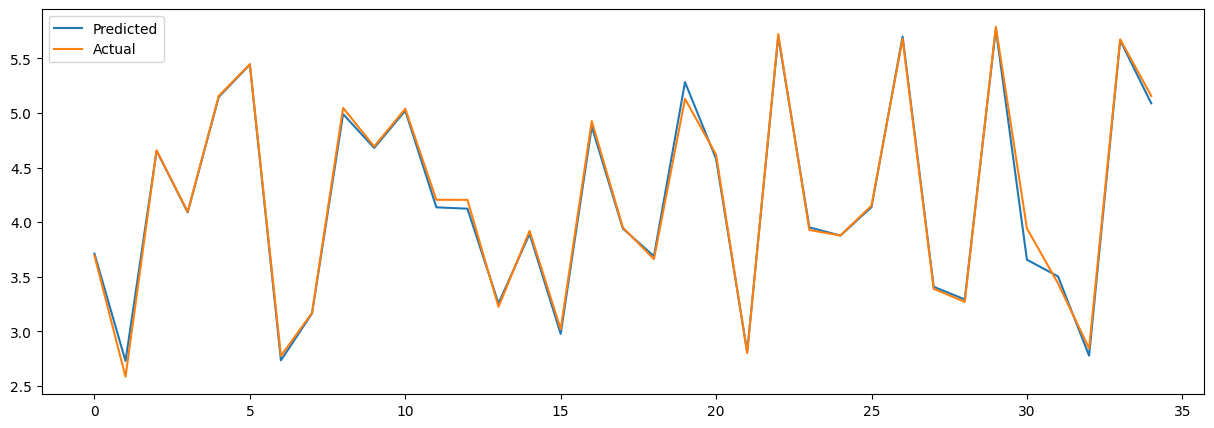

In [36]:
plt.figure(figsize=(15,5))
sns.lineplot(y_prediction_ridge,label='Predicted')
sns.lineplot(y_test,label='Actual')

##### Which hyperparameter optimization technique have you used and why?

we used grid searchcv as our data set is small and it exhaustively searches through all specified parameter combinations, ensuring that the best combination is found.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we improvement is seen before mse was **0.006494948628104687** are tuning it reduces to **0.0047928758585346586**

### ML Model - 3

In [29]:
# Create a Lasso regression model
lasso = Lasso(alpha=1.0)  # alpha is the regularization parameter

# Train the model
lasso.fit(X_train, y_train)

# Evaluate the model
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso}")

Lasso Regression Mean Squared Error: 0.8922016297074714


#### 2. Cross- Validation & Hyperparameter Tuning

In [37]:
LassoRegression = Lasso()
hyperParameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
LassoRegressor = GridSearchCV(LassoRegression, hyperParameters, scoring='neg_mean_squared_error', cv=5)
LassoRegressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.370e-01, tolerance: 8.704e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.442e-01, tolerance: 8.328e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.575e-01, tolerance: 8.305e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [38]:
print("Best value for lambda : ",LassoRegressor.best_params_)
print("Best score for cost function: ", LassoRegressor.best_score_)

Best value for lambda :  {'alpha': 1e-08}
Best score for cost function:  -0.005263632381173176


In [39]:
y_predict_lassocv= LassoRegressor.predict(X_test)
mse_lassocv = mean_squared_error(y_test, y_predict_lassocv)
print(f"Lasso Regression with cross validation Mean Squared Error: {mse_lassocv}")

Lasso Regression with cross validation Mean Squared Error: 0.00480011570432588


<Axes: >

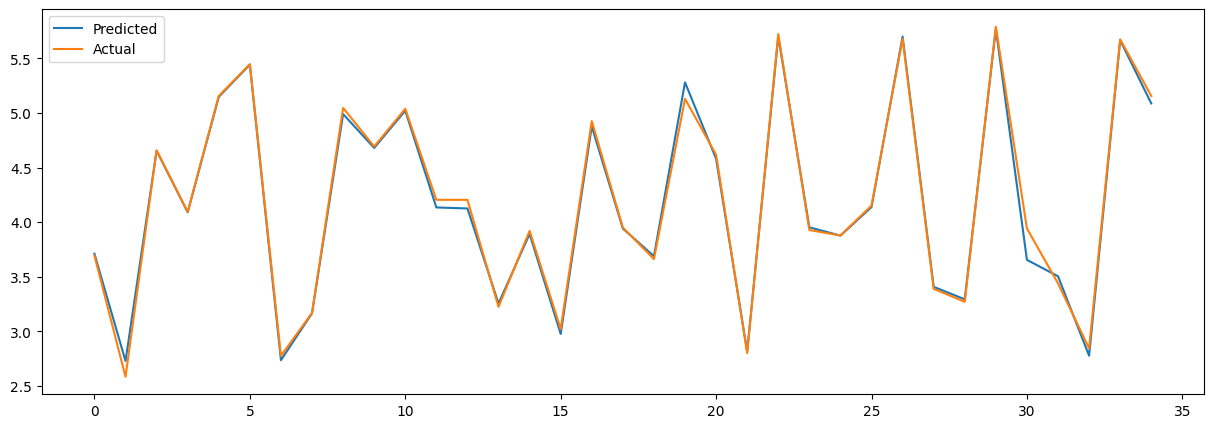

In [41]:
plt.figure(figsize=(15,5))
sns.lineplot(y_predict_lassocv,label='Predicted')
sns.lineplot(y_test,label='Actual')

##### Which hyperparameter optimization technique have you used and why?

we used grid searchcv as our data set is small and it exhaustively searches through all specified parameter combinations, ensuring that the best combination is found.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we improvement is seen before mse was **0.8922016297074714** are tuning it reduces to **0.00480011570432588**

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. MSE measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
2. A lower MSE indicates a better fit.
3. mse help the business to select best model for prediction.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We will choose ridge regression with hyperparameter tuning by gridsearchcv as it give high accuracy of prediction with lower mean squared error i.e 0.0047928758585346586

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. In our data set there were no null or duplicated values.
2. We have converted Date feature into DateTime format for further analysis.
3. We have done Univariate analysis and then Bivariate analysis to check data distribution and analyse relation between variables.
4. We have removed outier from our dataset by IQR outier removal
5. Then We scaled our data using log transformation.
6. Split our data into into train and test
7. Test our data on differnt model and evaluated the predicted value
8. We choose redge regression after  hyperparameter tuning by gridsearchcv as it give low mse error.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***